Part 1: Data Cleaning and Preprocessing
1.1 Load and Inspect the Dataset
• Load the dataset and display its shape, column names, and data types.
• Identify and list the number of missing values in each column.

In [189]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
data= pd.read_csv('Building_Energy_Benchmarking.csv')
data

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,21988624,Senior Services,311 34 AV SE,Calgary,T2G 1T7,Alberta,Office,1,1960,768,...,50,65.6,25615,980,NaN,NaN,25615.0,12.0,2022,2022-21988624
490,21988625,Fire Station #25,4705 76 AV SE,Calgary,T2C 2X1,Alberta,Fire Station,1,1982,1108,...,53,48.2,83298,1040,NaN,NaN,83298.0,39.0,2022,2022-21988625
491,21988627,EMS #6,1940 WESTMOUNT BV NW,Calgary,T2N 3G8,Alberta,Other - Public Services,1,1964,425,...,40,94.5,20725,782,NaN,NaN,20725.0,10.0,2022,2022-21988627
492,21988628,Fire Station #24,2607 106 AV SW,Calgary,T2W 4H7,Alberta,Fire Station,1,1978,1108,...,41,36.8,102861,794,NaN,541.0,103402.0,48.0,2022,2022-21988628


In [3]:
df=pd.DataFrame(data)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

In [5]:
#to find the null
df.isnull().sum()

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)                                    0

In [191]:
df.isnull().sum()/len(df)*100

Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               1.012146
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                        47.975709
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                     51.012146
Weat

1.2 Handling Missing Data
• Drop columns with more than 40% missing values.
• For numerical columns, fill missing values with the median of their respective column.
• For categorical columns, fill missing values with the mode of their respective column

In [9]:
#to remove more than 40% missing values- columns
threshold=40
columns_drop = (df.isna().mean()*100)[(df.isna().mean()*100) > threshold].index #to select the column where percebtage is greater than 40%, .index will extract the name of the selected column
df= df.drop(columns=columns_drop)
print("\nAfter dropping columns with more than 40% missing value:")
print(df)


After dropping columns with more than 40% missing value:
     Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDE

In [193]:
df.isnull().sum() #Making sure the removal applied

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                5
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                        237
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                     252
Weather Normalized Site Energy Use (GJ)                                  252

In [195]:
# Imputing missing values in numerical columns using the median
#starts a loop that goes through each column (col) in the DataFrame (df)
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median()) #inside loop fillna will fill missing value with the median

# Imputing missing values in categorical columns using the mode
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0]) #replacing missing value on the object dtype, with most frequently used value in that column

print("\nDataFrame with required imputing:")
print(df)


DataFrame with required imputing:
     Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDEN VALLEY DR NW   

    

1.3 Extracting and Cleaning Data Using Regex
• Use Regex only to:
o Extract numeric values from text-based numeric columns (e.g., Property GFA,
Energy Use, Emissions).
o Standardize Postal Codes to follow the Canadian format (A1A 1A1).
o Clean and extract meaningful text from Property Names and Addresses.
o Ensure extracted values are properly converted to numerical types for analysis.

In [197]:

def to_numeric(column, x):#column: represents the name of a column in the DataFrame.x:represents a value within that column.
#All the text based columns
    text_based_columns = {
        "Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)",
        "Weather Normalized Site Energy Use (GJ)", "Source Energy Use (GJ)",
        "Total GHG Emissions (Metric Tons CO2e)", "Direct GHG Emissions (Metric Tons CO2e)",
        "Electricity Use - Grid Purchase (kWh)", "Natural Gas Use (GJ)"
    }

    if column in text_based_columns:
        x = re.sub(r"[ ,]", "", x)  # remove spaces and commas from the input value x
        Pattern = re.search(r"\d+(?:\.\d+)?", x) #find numerical patterns in the cleaned value, 
        if Pattern:
            return float(Pattern.group())
    return None

print(df)

     Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDEN VALLEY DR NW   

        City Postal Code Province Prima

In [199]:
#Standardize Postal Codes to follow the Canadian format (A1A 1A1) using regex.
def standardize_postal_code(postal_code):
    pattern = r'^[ABCEGHJ-NPRSTVXY]\d[ABCEGHJ-NPRSTV-Z][ -]?\d[ABCEGHJ-NPRSTV-Z]\d$'
    if re.match(pattern, postal_code):
        return postal_code
    else:
        return None

df['Postal Code'] = df['Postal Code'].apply(standardize_postal_code)
print(df)

     Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDEN VALLEY DR NW   

        City Postal Code Province Prima

In [201]:
#defines a function that specifically targets the "Property Name" and "Address 1" columns.
#it removes any special characters or symbols that are not  essential for a typical property name or address,.
#displaying clean columns

def clean_text(column, x):
    if column in {"Property Name", "Address 1"}:
        return re.sub(r"[^\w\s,.#&-]", "", x)
print(df[["Property Name", "Address 1"]])

                       Property Name                  Address 1
0    Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE
1                         Ad Valorem              2924 11 ST NE
2               Alberta Trade Centre               315 10 AV SE
3                     Andrew Davison                133 6 AV SE
4             Animal Services Centre        2201 PORTLAND ST SE
..                               ...                        ...
489                  Senior Services               311 34 AV SE
490                 Fire Station #25              4705 76 AV SE
491                           EMS #6       1940 WESTMOUNT BV NW
492                 Fire Station #24             2607 106 AV SW
493                 Fire Station #36  10071 HIDDEN VALLEY DR NW

[494 rows x 2 columns]


In [21]:
#to Ensure extracted values are properly converted to numerical types for analysis using regex.
def converted_numerical_type(x):
    # Check if regex search finds a match before proceeding
    match = re.search(r"\d+\.?\d*", str(x))
    if match:
        num = re.sub(r"[ ,]", "", match.group())  # Remove spaces and commas if match is found
        # Convert to int if no decimal, otherwise to float
        return int(num) if num and '.' not in num else float(num)
    else:
        return None  # Return None if no numerical value is found

df["Property Name"] = df["Property Name"].apply(converted_numerical_type)
df["Address 1"] = df["Address 1"].apply(converted_numerical_type)
print(df)

     Property Id  Property Name  Address 1     City Postal Code Province  \
0       10176804            NaN       9009  Calgary     T2H 0Z4  Alberta   
1        6169481            NaN       2924  Calgary        None  Alberta   
2        6305956            NaN        315  Calgary     T2G 0W2  Alberta   
3        8854296            NaN        133  Calgary      T2G0G2  Alberta   
4       21988603            NaN       2201  Calgary     T2G 4M7  Alberta   
..           ...            ...        ...      ...         ...      ...   
489     21988624            NaN        311  Calgary     T2G 1T7  Alberta   
490     21988625           25.0       4705  Calgary     T2C 2X1  Alberta   
491     21988627            6.0       1940  Calgary     T2N 3G8  Alberta   
492     21988628           24.0       2607  Calgary     T2W 4H7  Alberta   
493     21988629           36.0      10071  Calgary     T3A 5G1  Alberta   

    Primary Property Type - Self Selected  Number of Buildings  Year Built  \
0        

Part 2: Exploratory Data Analysis (EDA) and Aggregations
2.1 Statistical Summary
• Generate summary statistics for numerical features using extracted data.
• Identify and explain key observations (e.g., outliers, mean vs. median differences).

In [203]:
summary_stats = df.describe() #using built-in function in the Pandas

print(summary_stats)

        Property Id  Number of Buildings   Year Built  \
count  4.940000e+02           494.000000   494.000000   
mean   1.308877e+07             1.060729  1980.091093   
std    5.659556e+06             0.278281    25.159568   
min    6.169481e+06             1.000000  1896.000000   
25%    9.563763e+06             1.000000  1970.000000   
50%    9.997794e+06             1.000000  1978.000000   
75%    2.198860e+07             1.000000  1996.000000   
max    2.198863e+07             3.000000  2018.000000   

       Property GFA - Self-Reported (m²)  ENERGY STAR Score  \
count                         494.000000         494.000000   
mean                         2636.087247          45.611336   
std                          6640.601809          17.452420   
min                           113.000000           1.000000   
25%                          1190.000000          46.000000   
50%                          1385.000000          46.000000   
75%                          1448.750000     

In [205]:
#to get the outliers
#selecting column from original data that contain numerical data types
For_Numerical = df.select_dtypes(include=['number']) 

Quantile1 = For_Numerical.quantile(0.25)
Quantile3 = For_Numerical.quantile(0.75)
IQR = Quantile3 - Quantile1

# Filter outliers only from numerical columns
outliers = ((For_Numerical < (Quantile1 - 1.5 * IQR)) | (For_Numerical > (Quantile3 + 1.5 * IQR)))

# Print the sum of outliers for numerical columns
print(outliers.sum())

Property Id                                                                0
Number of Buildings                                                       25
Year Built                                                                25
Property GFA - Self-Reported (m²)                                        163
ENERGY STAR Score                                                        163
Site Energy Use (GJ)                                                     242
Weather Normalized Site Energy Use (GJ)                                  242
Site EUI (GJ/m²)                                                          45
Weather Normalized Site EUI (GJ/m²)                                       44
Source Energy Use (GJ)                                                   232
Source EUI (GJ/m²)                                                        50
Weather Normalized Source EUI (GJ/m²)                                     51
Total GHG Emissions (Metric Tons CO2e)                                    27

In [27]:
#Mean vs Median difference
#selecting column from original data that contain numerical data types

For_Numerical = df.select_dtypes(include=['number'])

mean_values = For_Numerical.mean()
median_values = For_Numerical.median()

mean_median_diff = mean_values - median_values

print(mean_median_diff)


Property Id                                   3.090973e+06
Property Name                                 1.838235e+00
Address 1                                     7.027955e+02
Number of Buildings                           6.072874e-02
Year Built                                    2.091093e+00
Site EUI (GJ/m²)                              4.847976e-01
Weather Normalized Site EUI (GJ/m²)           5.003239e-01
Source EUI (GJ/m²)                            6.027530e-01
Weather Normalized Source EUI (GJ/m²)         6.297166e-01
Total GHG Emissions Intensity (kgCO2e/m²)     4.107166e+01
Direct GHG Emissions Intensity (kgCO2e/m²)    1.992186e+01
Year Ending                                  -4.048583e-03
dtype: float64


In [29]:
#Co-efficient of varaiation 
For_Numerical = df.select_dtypes(include=['number'])

std_dev = For_Numerical.std()
mean = For_Numerical.mean()

Coefficient_of_Variation = (std_dev / mean) * 100

print(Coefficient_of_Variation)

Property Id                                   43.239797
Property Name                                 66.570485
Address 1                                     94.715917
Number of Buildings                           26.234910
Year Built                                     1.270627
Site EUI (GJ/m²)                              73.625322
Weather Normalized Site EUI (GJ/m²)           73.551951
Source EUI (GJ/m²)                            69.996466
Weather Normalized Source EUI (GJ/m²)         69.960992
Total GHG Emissions Intensity (kgCO2e/m²)     68.993188
Direct GHG Emissions Intensity (kgCO2e/m²)    89.053708
Year Ending                                    0.069976
dtype: float64


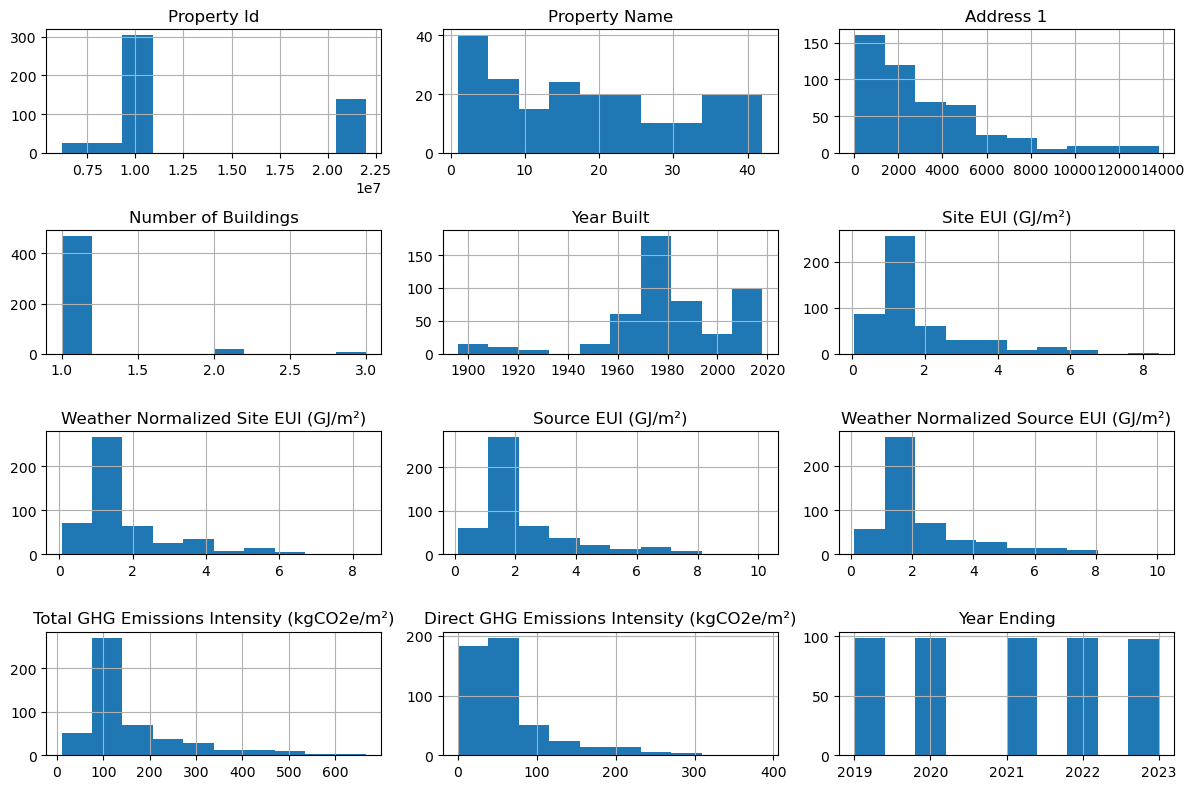

In [31]:
#Drawing the historgram
For_Numerical = df.select_dtypes(include=['number'])

For_Numerical.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

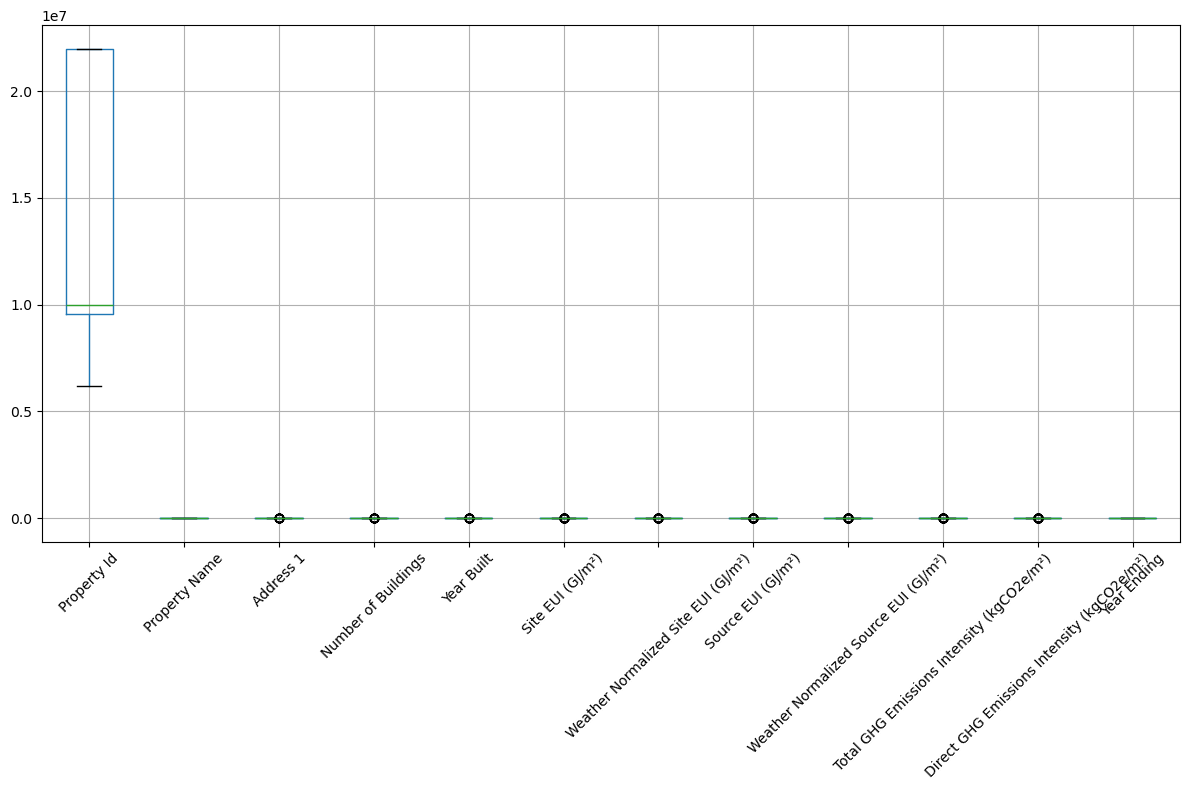

In [33]:
#to plot the boxplot
numerical_df = df.select_dtypes(include=['number'])

numerical_df.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.2 Aggregations
• Compute the average Energy Use Intensity (EUI) by Property Type.
• Compute the total Greenhouse Gas (GHG) emissions by year.
• Identify the top 5 properties with the highest total energy consumption.

In [35]:
# Compute the average Energy Use Intensity (EUI) by Property Type by using the main data
df['Site Energy Use (GJ)'] = pd.to_numeric(df['Site Energy Use (GJ)'], errors='coerce')
# Compute average EUI by Property Type
average_EUI = df.groupby("Primary Property Type - Self Selected")["Site Energy Use (GJ)"].mean()

# Display results
print(average_EUI)

Primary Property Type - Self Selected
Distribution Center                                 201844.000000
Fire Station                                          1483.534940
Fitness Center/Health Club/Gym                       22910.500000
Heated Swimming Pool                                  7891.166667
Ice/Curling Rink                                     11922.650000
Indoor Arena                                         16383.500000
Mixed Use Property                                     838.466667
Museum                                                3223.000000
Non-Refrigerated Warehouse                           10261.500000
Office                                                6858.328814
Other                                                  296.700000
Other - Public Services                                595.876190
Other - Recreation                                    1336.914286
Performing Arts                                       1495.500000
Repair Services (Vehicle, Shoe, Locksm

In [37]:
#Compute the total Greenhouse Gas (GHG) emissions by year.
Total_emissions_by_year = df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum().reset_index()

print(Total_emissions_by_year)

   Year Ending             Total GHG Emissions (Metric Tons CO2e)
0         2019  1,043.606041,293.7038145.71,624.90845.410,999....
1         2020  1,079.50581.71,335.40375.746.11,413.20803.510,...
2         2021  148.21,101.40540.91,293.80370.546.11,531.40778...
3         2022  1752201691111029522128237744145278094812761642...
4         2023  5099204991293568554229674637811372777477492657...


In [39]:
#Identify the top 5 properties with the highest total energy consumption
df=pd.DataFrame(data)
df['Site Energy Use (GJ)'] = pd.to_numeric(df['Site Energy Use (GJ)'], errors='coerce')
top_5_properties = df.groupby('Property Name')['Site Energy Use (GJ)'].sum().nlargest(5)

print(top_5_properties)

Property Name
Stoney Transit Facility                               403688.0
Municipal Complex                                     158945.0
Village Square Leisure Centre                         155887.0
Southland Leisure Centre                              112100.0
Foothills Aquatic Centre and Bauer and Bush Arenas     51730.0
Name: Site Energy Use (GJ), dtype: float64


2.3 Detecting Outliers Using Regex and IQR
• Use Regex only to:
o Identify values that do not conform to expected numeric formats.
o Remove or correct incorrectly formatted numeric values.
• Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions
(Metric Tons CO2e).
• Replace outliers with the median value for that property type.

In [70]:
# Detect Outliers Using IQR and Replace with Median Value by Property Type
def detect_outliers(data, col, group_col):
    # Convert the target column to numeric before outlier detection
    data[col] = pd.to_numeric(data[col], errors='coerce') 
    
    for group in data[group_col].unique():
        subset = data[data[group_col] == group]
        Q1 = subset[col].quantile(0.25)
        Q3 = subset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = subset[col].median()
        data.loc[(data[group_col] == group) & ((data[col] < lower_bound) | (data[col] > upper_bound)), col] = median_value

detect_outliers(df, 'Total GHG Emissions (Metric Tons CO2e)', 'Primary Property Type - Self Selected')

print(data)

     Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDEN VALLEY DR NW   

        City Postal Code Province Prima

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

Part 3: Data Visualization
3.1 Time-Series Visualization
• Plot the yearly trend of average Site Energy Use Intensity (EUI).
• Highlight any significant increases or decreases in energy usage.

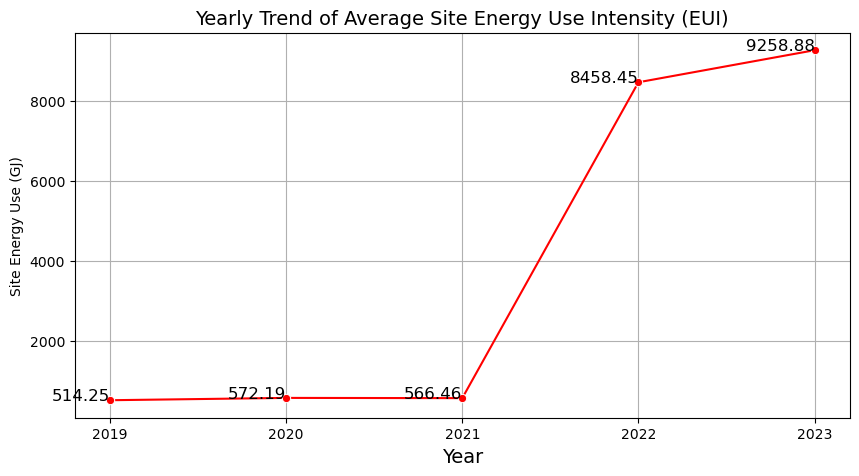

In [76]:
#Plot the yearly trend of average Site Energy Use Intensity (EUI)

df['Year Ending'] = pd.to_numeric(df['Year Ending'], errors='coerce')
Trends = df.groupby('Year Ending')['Site Energy Use (GJ)'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=Trends.index.astype(int), y=Trends.values, marker='o', linestyle='-', color='red')
plt.title("Yearly Trend of Average Site Energy Use Intensity (EUI)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Site Energy Use (GJ)", fontsize=10)
plt.grid(True)
plt.xticks(Trends .index.astype(int))
for year in Trends.index:
    plt.text(int(year), Trends [year], f"{Trends [year]:.2f}", fontsize=12, ha='right', color='black')
plt.show()


/var/folders/dw/vthhq25j7_j29qf3xb5f_frw0000gn/T/ipykernel_88001/2676193342.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Percent Difference'] = df['Site Energy Use (GJ)'].pct_change() * 100


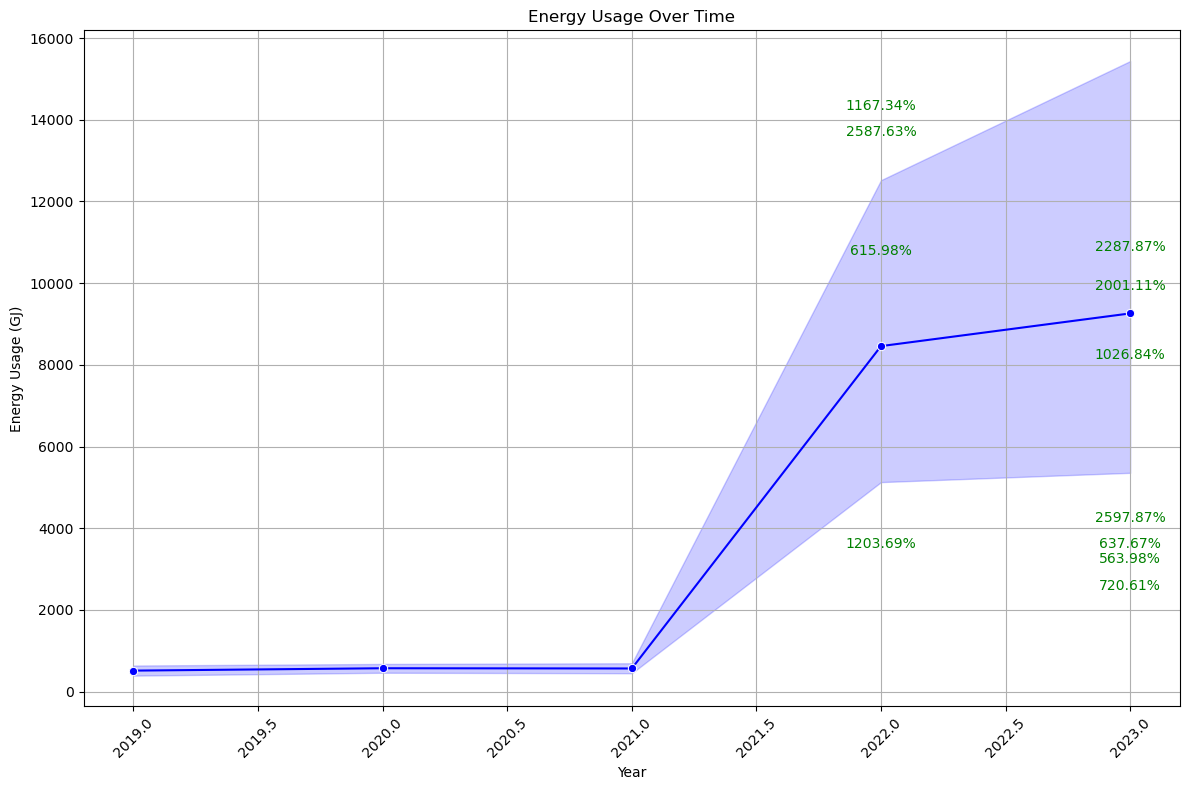

In [78]:
#to Highlight any significant increases or decreases in energy usage

# Calculate the percentage change
df['Percent Difference'] = df['Site Energy Use (GJ)'].pct_change() * 100

# Plotting the data using built in functions
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year Ending', y='Site Energy Use (GJ)', data=df, marker='o', linestyle='-', color='blue')
plt.title('Energy Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Usage (GJ)')
plt.grid(True)
minimizing_size = df[abs(df['Percent Difference']) > 10].nlargest(20, 'Percent Difference')
# Annotate significant increases or decreases
for index, row in minimizing_size.iterrows():
    if abs(row['Percent Difference']) > 10:  
        plt.annotate(f"{round(row['Percent Difference'], 2)}%", 
                     (row['Year Ending'], row['Site Energy Use (GJ)']),
                     textcoords="offset points", xytext=(0, 10), ha='center',
                     color='red' if row['Percent Difference'] < 0 else 'green')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.2 Comparative Bar Charts
• Create a bar chart showing the top 10 buildings with the highest GHG emissions.
• Annotate the bar chart with emission values.

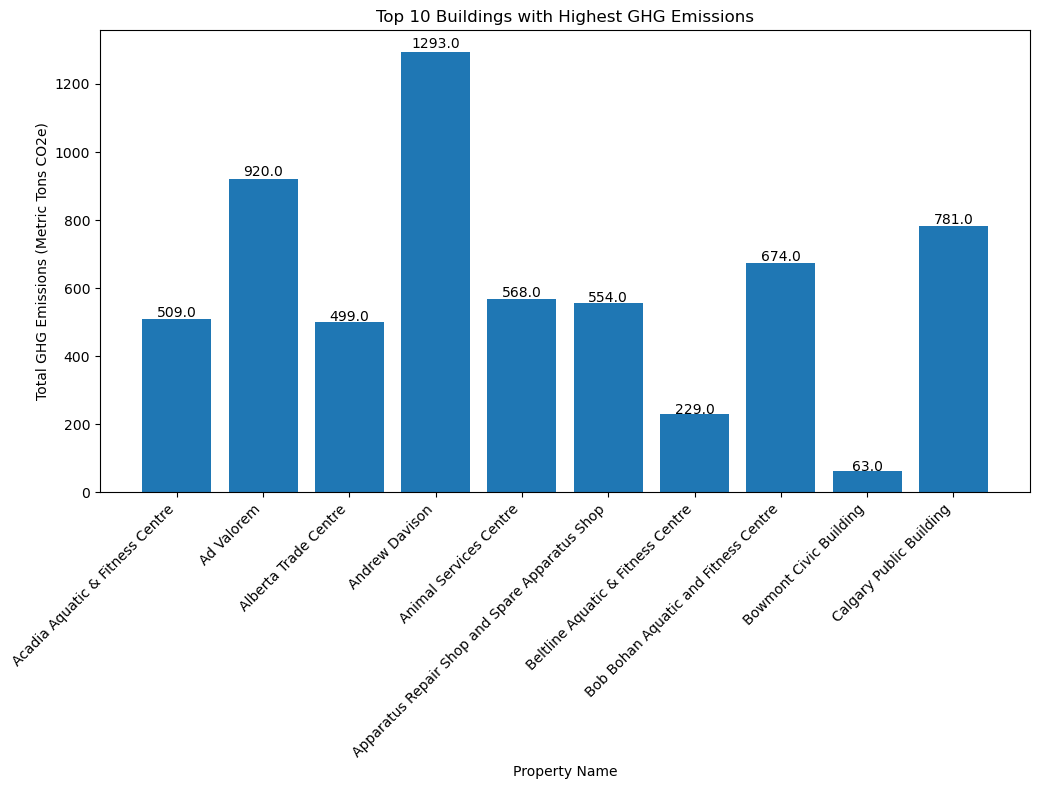

In [116]:
# Visualization - Top 10 buildings with highest GHG emissions
plt.figure(figsize=(12,6))
x_labels = df['Property Name'].head(10)
y_values = df['Total GHG Emissions (Metric Tons CO2e)'].head(10)

plt.bar(x_labels, y_values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Buildings with Highest GHG Emissions')
plt.xlabel('Property Name')
plt.ylabel('Total GHG Emissions (Metric Tons CO2e)')

# Annotate bars with emission values using plt.text()
for i, value in enumerate(y_values):
    plt.text(i, value + (value * 0.01), f'{value:.1f}', ha='center', fontsize=10, color='black')

plt.show()


In [ ]:
3.3 Heatmap Visualization
• Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property
types.

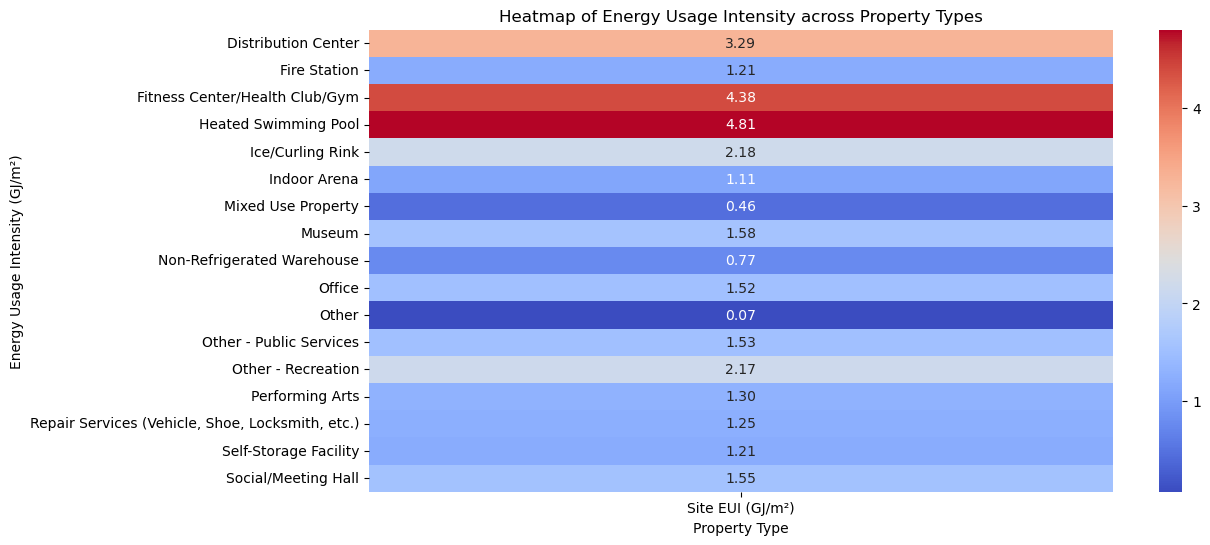

In [122]:
#To plot heatmap using the built in function
plt.figure(figsize=(12,6))
pivot_table = df.pivot_table(values='Site EUI (GJ/m²)', index='Primary Property Type - Self Selected', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Energy Usage Intensity across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Energy Usage Intensity (GJ/m²)')
plt.show()

Part 4: Further Analysis
4.1 Correlation Analysis
• Compute and visualize the correlation matrix between energy consumption, emissions,
and building size.
• Identify any strong correlations and explain their implications.
4.2 Hypothesis Testing
• Conduct a t-test (t-test is used to compare the means of two groups to determine if
they are significantly di6erent from each other. More at Student's t-test - Wikipedia)
comparing the average Energy Star Score between two different property types (e.g.,
Offices vs. Residential buildings).
• Interpret the results and discuss statistical significance.

In [207]:
#Conducting a t-test 

offices = df[df['Primary Property Type - Self Selected'] == 'Office']['ENERGY STAR Score'].dropna()
residential = df[df['Primary Property Type - Self Selected'] == 'Residential']['ENERGY STAR Score'].dropna()

offices_length = len(offices)
residential_length = len(residential)

if offices_length > 1 and residential_length > 1:
    offices_mean = offices.mean()
    residential_mean = residential.mean()

    offices_standard_deviation = offices.std()
    residential_standard_deviation = residential.std()

    pooled_std = np.sqrt(((offices_standard_deviation ** 2) / offices_length) + ((residential_standard_deviation ** 2) / residential_length))

    if pooled_std != 0:  # Ensure no division by zero
        t_stat = (offices_mean - residential_mean) / pooled_std
        print(f"T-test Results: t-statistic = {t_stat:.2f}")
    else:
        print("Standard deviation is zero, cannot compute t-statistic.")
else:
    print("Insufficient data for hypothesis testing.")


Insufficient data for hypothesis testing.


In [209]:
correlation_columns = ['Total Energy Use', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']
correlation_columns = [col for col in correlation_columns if col in df.columns]

# Converting to numeric
for col in correlation_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Droping rows with NaN values in correlation columns
df_corr = df[correlation_columns].dropna()

# Computing and printing the correlation matrix
if not df_corr.empty:
    corr_matrix = df_corr.corr()
    print("Correlation Matrix between Energy Consumption, Emissions, and Building Size:\n", corr_matrix)
else:
    print("No valid data available for correlation analysis.")


Correlation Matrix between Energy Consumption, Emissions, and Building Size:
                                         Total Energy Use  \
Total Energy Use                                1.000000   
Total GHG Emissions (Metric Tons CO2e)          0.851035   
Property GFA - Self-Reported (m²)               0.692959   

                                        Total GHG Emissions (Metric Tons CO2e)  \
Total Energy Use                                                      0.851035   
Total GHG Emissions (Metric Tons CO2e)                                1.000000   
Property GFA - Self-Reported (m²)                                     0.448468   

                                        Property GFA - Self-Reported (m²)  
Total Energy Use                                                 0.692959  
Total GHG Emissions (Metric Tons CO2e)                           0.448468  
Property GFA - Self-Reported (m²)                                1.000000  
